In [1]:
import os

In [2]:
# from google.colab import drive
# drive.mount('/content/gdrive/')

In [3]:
# !pip install finance-datareader
# !pip install catboost
# !pip install optuna

In [4]:
# !pip install catboost

In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import optuna
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score, f1_score, precision_score , recall_score, confusion_matrix, classification_report
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve
from sklearn.metrics import roc_curve, plot_roc_curve, roc_auc_score
from sklearn.preprocessing import Binarizer


from matplotlib.ticker import MaxNLocator           
%matplotlib inline 
from scipy import stats 
from scipy.stats import skew, boxcox_normmax, norm
from scipy.special import boxcox1p 
from catboost import CatBoostRegressor

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold

import matplotlib.image as img

import warnings
warnings.filterwarnings(action='ignore')
sns.set()

pd.options.display.max_columns = None
pd.set_option('display.max_rows',200)

plt.rcParams['font.family'] = 'Malgun Gothic'

# imblearn.sampling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

# impute.imputer
from sklearn.impute import SimpleImputer, MissingIndicator, KNNImputer
# preprocessing.encoding
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder # pd.get_dummies
# preprocessing.scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
# preprocessing.binarizing
from sklearn.preprocessing import Binarizer

# decomposition.PCA
from sklearn.decomposition import PCA
# stats : R module
from scipy.stats import skew, kurtosis

# estimators ---------------------------------------
# estimators.classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression # classifier
from sklearn.linear_model import RidgeClassifier, RidgeClassifierCV # regressor 응용
# estimators.regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.linear_model import ElasticNet, ElasticNetCV
# --------------------------------------------------

# neural network -----------------------------------
# import tensorflow as tf
import keras
# --------------------------------------------------

# ensemble -----------------------------------------
# ensemble.bagging
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
# ensemble.boosting
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
# from catboost import CatBoostClassifier, CatBoostRegressor
# ensemble.boosting & bagging
from xgboost import XGBRFClassifier, XGBRFRegressor
# ensemble.voting
from sklearn.ensemble import VotingClassifier, VotingRegressor
# --------------------------------------------------

# metrics ------------------------------------------
# metrics.scores
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import log_loss
# metrics.reports
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
# metrics.errors
from sklearn.metrics import mean_squared_error     # 'neg_mean_squared_error', 'neg_root_mean_squared_error'
from sklearn.metrics import mean_squared_log_error # 'neg_mean_squared_log_error'
from sklearn.metrics import mean_absolute_error    # 'neg_mean_absolute_error'
# metrics.curves
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve
from sklearn.metrics import roc_curve, plot_roc_curve
# --------------------------------------------------

# model_selection ----------------------------------
# model_selection.splitter
from sklearn.model_selection import train_test_split
# model_selection.model_validation
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score, cross_validate
# model_selection.hyper_parameter_optimizer
from sklearn.model_selection import GridSearchCV
# --------------------------------------------------

# optuna -------------------------------------------
import optuna
# --------------------------------------------------

In [6]:
cus   = pd.read_csv('./data/cus_info.csv')
iem   = pd.read_csv('./data/iem_info_20210902.csv')
hist  = pd.read_csv('./data/stk_bnc_hist.csv')
train = pd.read_csv('./data/stk_hld_train.csv')
test  = pd.read_csv('./data/stk_hld_test.csv')
submission   = pd.read_csv('./data/sample_submission.csv')

In [7]:
test

,act_id,iem_cd,byn_dt,hist_d,submit_id,hold_d
0,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A032640,20200522,153,IDX00001,0
1,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A160600,20190823,335,IDX00002,0
2,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A234340,20200611,139,IDX00003,0
3,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A131760,20200120,236,IDX00004,0
4,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A293490,20201217,9,IDX00005,0
...,...,...,...,...,...,...
70591,564af3cf975ed4fa05148ada689d5002e9c2d43dee9481...,A000810,20201127,23,IDX70592,0
70592,564af3cf975ed4fa05148ada689d5002e9c2d43dee9481...,A005945,20200731,103,IDX70593,0
70593,4561928f2825f6389f228088ac807a9fb4575ffdcbc47a...,A004740,20170704,858,IDX70594,0
70594,4561928f2825f6389f228088ac807a9fb4575ffdcbc47a...,A001630,20201215,11,IDX70595,0


In [8]:
grp_train_test = pd.concat([train[['act_id', 'iem_cd', 'hold_d']], test[['act_id', 'iem_cd', 'hist_d']]]).groupby(by=['act_id', 'iem_cd']).sum()
grp_train_test['total_hold'] = grp_train_test['hold_d'] + grp_train_test['hist_d']


# hist의 계좌/종목별 [거래횟수] 와 train과 test에 있는 계좌/종목별 [보유기간] 합친 dataframe 구성
grp = pd.concat(
    [
        hist.groupby(by=['act_id', 'iem_cd']).count(),
        grp_train_test[['total_hold']],
    ],
    axis=1
)[['bse_dt', 'total_hold']]

# grp['agr'] : 보유기간/ 거래횟수
grp['agr'] = grp['total_hold'] / grp['bse_dt'] 
grp['agr']

# 보유기간이 0인 경우, np.inf를 0으로 대체
# grp = grp.replace(np.inf, 1)

# 계좌단위 agr 평균 : 해당 계좌의 공격적인 성향
grp_mean = grp.groupby('act_id').mean()['agr']
df3333 = pd.DataFrame(grp_mean)
df3333 = df3333.reset_index()

# grp_mean.hist(bins=50)

#거래횟수 / 보유기간의 평균 5개 구간으로 구간화 1,2,3,4,5 = 높을수록 적극적 투자자 
# grp_mean.describe()
# grp_mean['ivs_be'] = grp_mean['agr']                                             #pd.cut(grp_mean['agr'],bins=[0, 25, 75 , 125, 175, 200] , labels=['1','2','3','4','5'])

df1 = pd.DataFrame(train['act_id'])
mer = pd.merge(left = df1 , right = df3333, how = "inner", on = "act_id")
train['ivs_be'] = mer['agr']

df2 = pd.DataFrame(test['act_id'])
mer = pd.merge(left = df2 , right = df3333, how = "inner", on = "act_id")
test['ivs_be'] = mer['agr']

# train['ivs_be'] = train['ivs_be'].astype(int)
# test['ivs_be'] = test['ivs_be'].astype(int)

In [9]:
train['long'] = 0
train.loc[train['ivs_be']>5, 'long'] = 1

In [10]:
# train[train['ivs_be']>5]['act_id'].count() / test['ivs_be'].count() * 100

In [11]:
test['long'] = 0
test.loc[test['ivs_be']>5, 'long'] = 1

In [12]:
import matplotlib as mpl
import statsmodels.api as sm
import scipy.stats as stats


In [13]:
# 버릴거

# hist  = stk_par_pr, 

# # 스케일링할거

# iem = btp_cfc_cd

# #겟더미할거


<AxesSubplot:>

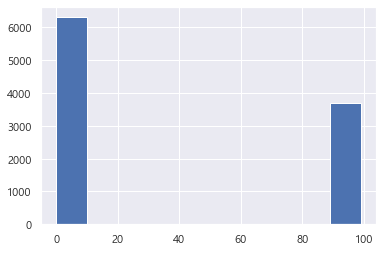

In [14]:
cus['ivs_icn_cd'].hist()

In [15]:
# label 조건 확인 코드
# temp = pd.merge(test.drop('hold_d', axis=1), sub, how='left', on='submit_id')
# condition1 = temp['hist_d'] >= temp['hold_d']
# condition2 = ((temp['hold_d'] - temp['hist_d']) > 146)
# temp[condition1 | condition2] 

In [16]:
## 비상장 하드코딩 

besan =['286340', '281630', '27863K', '246780', '250990', '277290', '266930', '113300', '34534K', 
'214240', '270730', '304720', '064400', '339610', '319700', '318140', '294080', '258340', 
'228980', '156000', '312800', '228990', '34385K', '283970', '298410', '239280', '210160', 
'32904L', '272810', '309110', '357100', '276980', '280470', '289190', '292070', '298130', 
'300500', '302110', '306920', '093810', '163290', '179090', '194530', '199890', '226590', 
'240600', '244310', '255780', '271530', '271830', '298210', '311120', '255890', '34695K', 
'078510', '285340', '319810', '325840', '31508K', '31134K', '254650', '24251Q', '067030', 
'285820', '278470', '239620', '276040', '332760', '259070', '333900', '277490', '191390', 
'235370', '134660', '158320', '262100', '30703K', '29923L', '145730', '123780', '364460', 
'201400', '141280', '293990', '064470', '337280', '322590', '106870', '241660', '313100', 
'318590', '239970', '370310', '153760', '169830', '270530', '122230', '259290', '203900',
 '309740', '279120', '238820', '256970', '277310', '29922L', '30018L', '33129K', '333450',
 '366510', '350990', '306130', '226250', '258840', '004050', '32316K', '316840', '35732K', 
'145940', '276960', '249680', '240180', '236490', '299760', '314080', '316320', '336730',
 '340750', '170190', '177850', '234820', '244290', '258890', '259210', '266530', '142220',
 '35286N', '285880', '213930', '234760', '344250', '344540', '060080', '350340', '284710', 
'169140', '358580', '186630', '272850']

abesan = []
for i in besan:
  abesan.append('A' + i)

In [17]:
cus[cus['sex_dit_cd']==1]['act_id'].count() / cus['sex_dit_cd'].count()  #남자 59 여자 41

0.5985

In [18]:
idx = test[test['iem_cd'].str[1:].isin(besan)]['submit_id']

In [19]:
# train에 hist_d 컬럼 만들기
train["hist_d"] = train["hold_d"]*0.63
train.hist_d = np.trunc(train["hist_d"])

In [20]:
# merge: train_data = train + cus + iem
train_data = pd.merge(train, cus, how = "left", on = ["act_id"])
train_data = pd.merge(train_data, iem, how = "left", on = ["iem_cd"])

test_data = pd.merge(test, cus, how = "left", on = ["act_id"])
test_data = pd.merge(test_data, iem, how = "left", on = ["iem_cd"])

In [21]:
# train_data.loc[train_data['sex_dit_cd']== 1, 'ivs_sex'] = train_data['ivs_be'] * 1
# train_data.loc[train_data['sex_dit_cd']== 2, 'ivs_sex'] = train_data['ivs_be'] * 0.5

# test_data.loc[test_data['sex_dit_cd']== 1, 'ivs_sex'] = test_data['ivs_be'] * 1
# test_data.loc[test_data['sex_dit_cd']== 2, 'ivs_sex'] = test_data['ivs_be'] * 0.5

In [22]:
# train_data의 label 분리
train_label = train_data["hold_d"]
train_data.drop(["hold_d"], axis = 1, inplace = True)

In [23]:
# 수훈, 소현, 소윤 Drop: 투자성향('ivs_icn_cd'), 주거래상품군('mrz_pdt_tp_sgm_cd')
train_data.drop(['mrz_pdt_tp_sgm_cd','ivs_icn_cd'], axis=1, inplace=True)
test_data.drop(['mrz_pdt_tp_sgm_cd','ivs_icn_cd'], axis=1, inplace=True)

In [24]:
# 파생변수
hist["stk_p"] = hist["tot_aet_amt"] / hist["bnc_qty"]
hist = hist.fillna(0)

# merge: train_data + hist
train_data = pd.merge(train_data, hist, how = "left", on = ["act_id", "iem_cd"])

# train_data: 매수일 = 기준일 처리
train_data = train_data[(train_data["byn_dt"] == train_data["bse_dt"])]
train_data.reset_index(drop = True, inplace = True)

# test_data: 매수일 = 기준일 처리
test_data = pd.merge(test_data, hist, how = "left", on = ["act_id", "iem_cd"])
test_data = test_data[(test_data["byn_dt"] == test_data["bse_dt"])]
test_data.reset_index(drop = True, inplace = True)

# Drop: 계좌ID, 종목코드, 매수일, 기준일 
train_data = train_data.drop(["act_id", "iem_krl_nm", "byn_dt", "bse_dt"], axis = 1)
test_data = test_data.drop(["act_id", "iem_krl_nm", "byn_dt", "submit_id", "hold_d", "bse_dt"], axis = 1)

train_data.drop('stk_par_pr', axis=1, inplace=True)
test_data.drop('stk_par_pr', axis=1, inplace=True)

# 인코딩: 한글이름
L_encoder = LabelEncoder()
L_encoder.fit(iem["iem_cd"])
train_data["iem_cd"] = L_encoder.transform(train_data["iem_cd"])
test_data["iem_cd"] = L_encoder.transform(test_data["iem_cd"])

# train_data.get_dummies()
# test_data.

In [25]:
# train_data.head()

cols = ['sex_dit_cd','lsg_sgm_cd','mrz_btp_dit_cd','btp_cfc_cd','mkt_pr_tal_scl_tp_cd','stk_dit_cd']

# for col in cols:
#   L_encoder.fit(train_data[col])
#   train_data[col] = L_encoder.transform(train_data[col])
#   test_data[col] = L_encoder.transform(test_data[col])

In [26]:
for i in cols:
  train_data[i] = train_data[i].astype(str)
  test_data[i] = test_data[i].astype(str)

In [27]:
# train_data = pd.get_dummies(train_data)
# test_data = pd.get_dummies(test_data)

In [28]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681472 entries, 0 to 681471
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   iem_cd                681472 non-null  int32  
 1   ivs_be                681472 non-null  float64
 2   long                  681472 non-null  int64  
 3   hist_d                681472 non-null  float64
 4   sex_dit_cd            681472 non-null  object 
 5   cus_age_stn_cd        681472 non-null  int64  
 6   cus_aet_stn_cd        681472 non-null  int64  
 7   lsg_sgm_cd            681472 non-null  object 
 8   tco_cus_grd_cd        681472 non-null  int64  
 9   tot_ivs_te_sgm_cd     681472 non-null  int64  
 10  mrz_btp_dit_cd        681472 non-null  object 
 11  btp_cfc_cd            681472 non-null  object 
 12  mkt_pr_tal_scl_tp_cd  681472 non-null  object 
 13  stk_dit_cd            681472 non-null  object 
 14  bnc_qty               681472 non-null  float64
 15  

In [29]:
# reset_index
train_data.reset_index(drop = True, inplace=True)
train_label.reset_index(drop = True, inplace=True)

# 옵튜나 비슷햇던거

In [30]:
# # #---------------------------------**karg  C:V C:V c=v c=v
# # # objective 할 수 있는 def를 먼저 만들자  객체담는 펑션 만들기
# # # 함수안에 파라미터 객제담을 trial object 만들기 uniform 은 아무 상태나 가능 int / float
# # # trail에 파라미터 값 넣기  **karg 넣으면 키밸류 쌍으로 움직이기 가능
# # # 모델 여러개 쓰고싶으면 여러개 만들어서 적용~~

# def my_objective(trial):
#     # 지수면 suggest_loguniform , 숫자면 suggest_int , float면 suggest_uniform
#     myparam = { 
#     "learning_rate"  : trial.suggest_uniform('learning_rate', 0.005, 10),}
#     # "metric_period" : trial.suggest_int('metric_period', 1, 500),
#     # "early_stopping_rounds" : trial.suggest_int('early_stopping_rounds', 1,200),
#     # "snapshot_interval" : trial.suggest_int('snapshot_interval', 600,1000) }

#     X_train, X_test, y_train, y_test = train_test_split(train_data, train_label, test_size=0.2)
#     model = CatBoostRegressor(**myparam)
#     model.fit(X_train, y_train)   
#     pred = model.predict(X_test)
#     proba = model.predict_proba(X_test)
#     score = sqrt(mean_squared_error(y_test, proba))  #예측값과 실값의 차이 따라서 proba값을 넣어야함  #
#     return score
#     # sample_weight = [0.1 , 0.2 , 0. 7 ]  # 맞출 때 마다 가중치 몰아주기 0 1 2 인경우 smote효과를 줌

    

# # 3.Create a study object and invoke the optimize method over 100 trials

# study = optuna.create_study(sampler=optuna.samplers.TPESampler(seed=1414), direction="minimize") # optuna가 갖고있음
# study.optimize(my_objective, n_trials=100)  # 이때 옵티마이즈 안에는 함수 이름을 넣으면됨


# best_param = study.best_params  # E.g. {'x': 2.002108042}
# print(best_param)

# # 4. best parameter  적용해서 다시 재학습

# model = CatBoostRegressor(**best_param) #{ : } **karg c:v  c=v
# # model.fit(X_train,y_train )
# # pred = model.predict(X_test)
# # proba = model.predict_proba(X_test)
# # score = sqrt(mean_squared_error(y_test, proba)
# # print("튜닝점수 :", score)


# # 1차 점수 : 0.6818920982647808
# # 튜닝점수 : 0.4583082597630171
# # {'max_depth': 11.867538165886453, 'min_samples_leaf': 0.0314907598135849, 'min_samples_split': 0.08801084185748041}
# # [I 2021-09-17 17:12:18,590] Trial 29 finished with value: 0.5779428567328839 and parameters: {'max_depth': 12.916755465378582, 'min_samples_leaf': 0.2643216567689809, 'min_samples_split': 0.19909312534093976}. Best is trial 26 with value: 0.5004295631954416.
# # 0.492362608677378

# 큰일낫다! 

In [31]:
# train_label = np.log1p(train_label)

In [32]:
# from catboost import CatBoost
# import numpy as np


# folds = KFold(n_splits=10)
# for train_idx, val_idx in folds.split(train_data):
    
#     train_x = train_data.iloc[train_idx, :]
#     train_y = train_label[train_idx]
#     val_x = train_data.iloc[val_idx, :]
#     val_y = train_label[val_idx]
    

#     model = CatBoost()

#     grid = {'learning_rate': [0.01, 0.03, 0.05, 0.08],
#             'depth': [2,4,8,10],
#             'l2_leaf_reg': [1, 3, 5, 7, 9]}

#     grid_search_result = model.grid_search(grid, train_x, train_y, 
                                        
#                                           verbose=500)


In [33]:
# 모델링
models = []

folds = KFold(n_splits=10)
for train_idx, val_idx in folds.split(train_data):
    
    train_x = train_data.iloc[train_idx, :]
    train_y = train_label[train_idx]
    val_x = train_data.iloc[val_idx, :]
    val_y = train_label[val_idx]
    
    model =CatBoostRegressor(iterations=None,
                        learning_rate=0.03,
                        depth=2,
                        l2_leaf_reg=None,
                        model_size_reg=None,
                        use_best_model=True,
                        rsm=None,
                        loss_function='RMSE')
    
  
    model.fit(train_x, train_y,
              eval_set=[(val_x, val_y)],
              verbose=500)
    
    models.append(model)

0:	learn: 1.2274504	test: 1.3031779	best: 1.3031779 (0)	total: 182ms	remaining: 3m 1s
500:	learn: 0.0682797	test: 0.0675957	best: 0.0675957 (500)	total: 21.6s	remaining: 21.5s
999:	learn: 0.0681579	test: 0.0674491	best: 0.0674491 (998)	total: 43.8s	remaining: 0us

bestTest = 0.06744913313
bestIteration = 998

Shrink model to first 999 iterations.
0:	learn: 1.2235566	test: 1.3362293	best: 1.3362293 (0)	total: 67ms	remaining: 1m 6s
500:	learn: 0.0682707	test: 0.0672427	best: 0.0672427 (500)	total: 24.5s	remaining: 24.4s
999:	learn: 0.0681684	test: 0.0671470	best: 0.0671469 (993)	total: 45.3s	remaining: 0us

bestTest = 0.06714687561
bestIteration = 993

Shrink model to first 994 iterations.
0:	learn: 1.2215906	test: 1.3526180	best: 1.3526180 (0)	total: 58.7ms	remaining: 58.6s
500:	learn: 0.0682966	test: 0.0663235	best: 0.0663235 (500)	total: 23.6s	remaining: 23.5s
999:	learn: 0.0682374	test: 0.0662720	best: 0.0662720 (999)	total: 44.7s	remaining: 0us

bestTest = 0.06627201161
bestIteratio

In [34]:
result = []
for i in models:
    result.append(i.predict(test_data))
predict = np.mean(result, axis = 0)

In [35]:
# predict = np.expm1(predict)
predict

array([242.53853579, 531.98362163, 218.60649532, ..., 783.60501842,
        18.4645101 ,   7.01124453])

In [36]:
# label 조건 확인 코드
# temp = pd.merge(test.drop('hold_d', axis=1), sub, how='left', on='submit_id')
# condition1 = temp['hist_d'] >= temp['hold_d']
# condition2 = ((temp['hold_d'] - temp['hist_d']) > 146)
# temp[condition1 | condition2] 

In [37]:
# for i in predict:
#   if i

In [38]:
# nam = test_data[test_data['sex_dit_cd']==1].index
# nam

In [39]:
submission["hold_d"] = np.round(predict)

In [40]:
submission["ss"]=submission["hold_d"]-test["hist_d"]
submission

,submit_id,hold_d,ss
0,IDX00001,243.0,90.0
1,IDX00002,532.0,197.0
2,IDX00003,219.0,80.0
3,IDX00004,375.0,139.0
4,IDX00005,15.0,6.0
...,...,...,...
70591,IDX70592,37.0,14.0
70592,IDX70593,166.0,63.0
70593,IDX70594,784.0,-74.0
70594,IDX70595,18.0,7.0


In [41]:
# for i in nam:
#   submission['hold_d'].loc[i] = submission['hold_d'].loc[i] - 1 

In [42]:
submission.loc[submission['ss']<0, 'ss'] = 1  # + hist

In [43]:
submission.loc[submission['ss']>146, 'ss'] = 146

In [44]:
for i in idx:
  submission.loc[submission['submit_id']==i, 'ss'] = 146
  

In [45]:
submission['hold_d'] = submission['ss'] + test['hist_d']

In [46]:
submission.drop("ss",axis=1,inplace=True)

In [47]:
test.head()

,act_id,iem_cd,byn_dt,hist_d,submit_id,hold_d,ivs_be,long
0,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A032640,20200522,153,IDX00001,0,15.569043,1
1,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A160600,20190823,335,IDX00002,0,15.569043,1
2,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A234340,20200611,139,IDX00003,0,15.569043,1
3,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A131760,20200120,236,IDX00004,0,15.569043,1
4,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A293490,20201217,9,IDX00005,0,15.569043,1


In [48]:
submission

,submit_id,hold_d
0,IDX00001,243.0
1,IDX00002,481.0
2,IDX00003,219.0
3,IDX00004,375.0
4,IDX00005,15.0
...,...,...
70591,IDX70592,37.0
70592,IDX70593,166.0
70593,IDX70594,859.0
70594,IDX70595,18.0


In [49]:
# for i in idx:
#   submission['hold_d'].loc[i] = test['_d'].loc[i] + 146

In [51]:
# submission.to_csv("./sub/67_16__2.csv", index = False)

In [ ]:
cus

In [ ]:
submission

In [ ]:
hist.head()